<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/04_anomaly_detection/04_anomaly_detection_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Przygotowanie danych](#3)
5. [Prophet - budowa modelu](#4)
6. [Wizualizacja działania modelu](#5)
7. [Budowa modelu - wrzesień](#6)




### <a name='0'></a> Import bibliotek

In [1]:
import fbprophet
import pandas as pd
import plotly.express as px

fbprophet.__version__

'0.5'

### <a name='1'></a> Załadowanie danych

In [2]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', parse_dates=['timestamp'])
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
timestamp    14398 non-null datetime64[ns]
count        14398 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


### <a name='2'></a> Wizualizacja danych

In [4]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [5]:
px.scatter(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#42f5d4'])

### <a name='3'></a> Przygotowanie danych

In [6]:
data = df.copy()
data.columns = ['ds', 'y']
data.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

Danymi wejściowymi do klasy Prophet jest zawsze obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn: 
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


### <a name='4'></a> Prophet - budowa modelu

In [7]:
from fbprophet import Prophet

model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [8]:
forecast.head(3)

ds       trend  ...  additive_terms_upper        yhat
0 2018-09-25 14:01:00  113.012662  ...                   0.0  162.061854
1 2018-09-25 14:02:00  113.010776  ...                   0.0  162.121697
2 2018-09-25 14:03:00  113.008890  ...                   0.0  162.178016

[3 rows x 16 columns]

In [9]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  113.012662  162.061854  133.035261  188.628329
1 2018-09-25 14:02:00  113.010776  162.121697  135.572386  189.134109
2 2018-09-25 14:03:00  113.008890  162.178016  132.991884  188.773024

In [10]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  113.012662  133.035261  ...  162.061854  182.478        1
1 2018-09-25 14:02:00  113.010776  135.572386  ...  162.121697  176.231        1
2 2018-09-25 14:03:00  113.008890  132.991884  ...  162.178016  183.917        1

[3 rows x 18 columns]

### <a name='5'></a> Wizualizacja działania modelu

In [11]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [12]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [13]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  162.061854  135.215493  191.282754
1 2018-09-25 14:02:00  162.121697  136.954906  190.337786
2 2018-09-25 14:03:00  162.178016  135.755388  188.564311
3 2018-09-25 14:04:00  162.230786  134.829435  188.035343
4 2018-09-25 14:05:00  162.279982  135.090295  188.691120

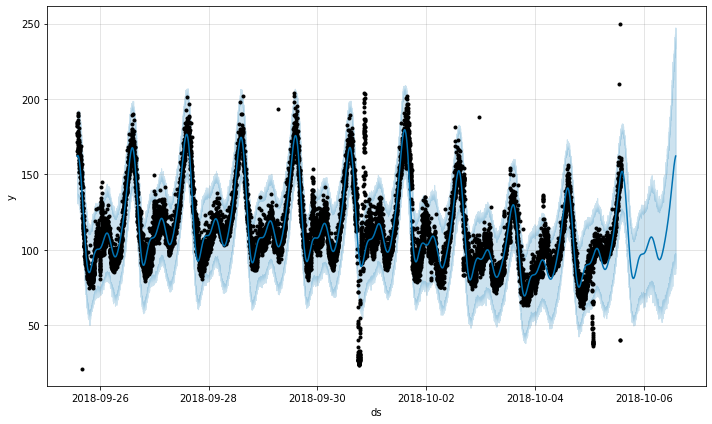

In [14]:
_ = model.plot(forecast)

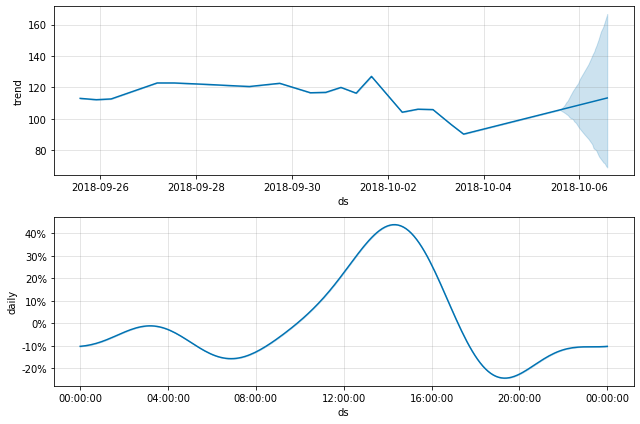

In [15]:
_ = model.plot_components(forecast)

In [20]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

### <a name='6'></a> Budowa modelu - wrzesień

In [21]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [22]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.062749  165.385430  136.614524  195.149721
1 2018-09-25 14:02:00  115.047325  165.413429  134.690252  196.082723
2 2018-09-25 14:03:00  115.031901  165.437526  136.690792  194.034821

In [23]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  115.062749  136.614524  ...  165.385430  182.478        1
1 2018-09-25 14:02:00  115.047325  134.690252  ...  165.413429  176.231        1
2 2018-09-25 14:03:00  115.031901  136.690792  ...  165.437526  183.917        1

[3 rows x 18 columns]

In [24]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [25]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0    2018-09-25 14:01:00
1    2018-09-25 14:02:00
2    2018-09-25 14:03:00
3    2018-09-25 14:04:00
4    2018-09-25 14:05:00
...                  ...
9234 2018-10-01 23:55:00
9235 2018-10-01 23:56:00
9236 2018-10-01 23:57:00
9237 2018-10-01 23:58:00
9238 2018-10-01 23:59:00

[9239 rows x 1 columns]

In [26]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  165.385430  135.417941  193.144830
1 2018-09-25 14:02:00  165.413429  133.628173  194.830600
2 2018-09-25 14:03:00  165.437526  135.624450  193.748089
3 2018-09-25 14:04:00  165.457699  137.103789  198.277916
4 2018-09-25 14:05:00  165.473925  136.695386  193.188844

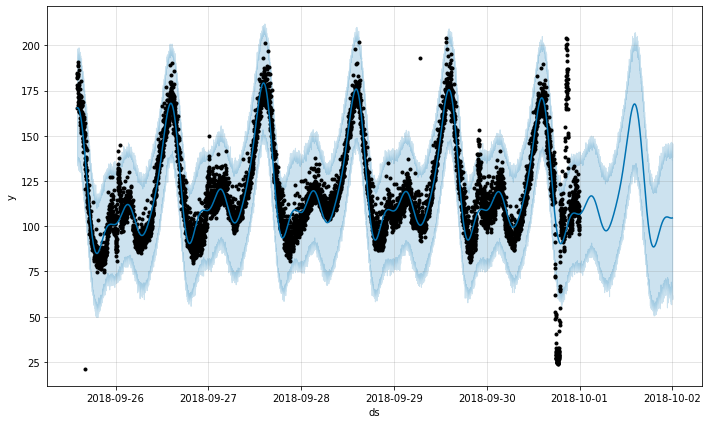

In [27]:
_ = model.plot(forecast)

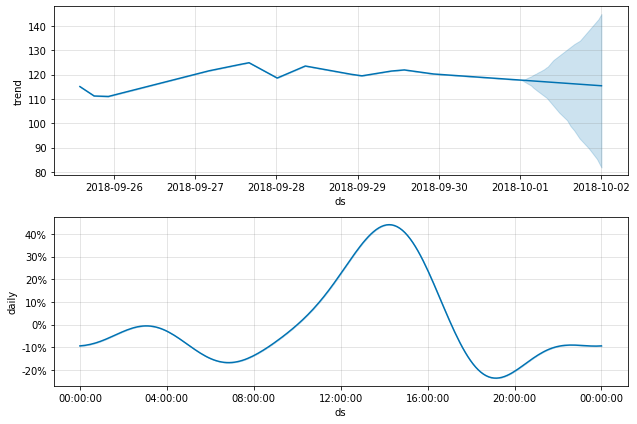

In [28]:
_ = model.plot_components(forecast)

In [29]:
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')